In [436]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [437]:
#summ_df = pd.read_csv(r'C:\Users\Hemish Savaliya\Downloads\summ.csv', encoding='latin1')
summ_df = pd.read_csv(r'C:\Users\Hemish Savaliya\Documents\summ_embed_final\merged_embeddings_final.csv')
synth_df = pd.read_csv(r'C:\Users\Hemish Savaliya\Downloads\synthetic-original-augmented-D2-1.csv', engine='python',  on_bad_lines='skip')
per_df = pd.read_csv(r'C:\Users\Hemish Savaliya\Downloads\personalized_test.tsv', delimiter='\t')
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

Selection deleted

embed_df = pd.read_pickle(r'C:\Users\Hemish Savaliya\Documents\summ_embed_final\synth_mapped_14.pkl')

SyntaxError: invalid syntax (439251342.py, line 9)

In [ ]:
# Drop rows where Summaries < 1
embed_df_filtered = embed_df[embed_df['Summaries'] >= 1].reset_index(drop=True)

# Verify the result
print("Filtered embed_df (Summaries >= 1):")
print(embed_df_filtered.head())

# Optional: Check the number of rows removed
rows_removed = len(embed_df) - len(embed_df_filtered)
print(f"Number of rows removed: {rows_removed}")


In [ ]:
embed_df_filtered.shape

In [ ]:
embed_df

In [ ]:
print(type(embed_df['Mapped_Embeddings'].iloc[0]))  # Should be a list
print(type(embed_df['Mapped_Embeddings'].iloc[0][0]))  # Should be numpy.ndarray


In [ ]:
def map_summid_to_newsids(embed_df, summ_df):
    """
    Map SummIDs in embed_df to their corresponding NewsIDs from summ_df.
    Adds a new column to embed_df with mapped NewsIDs for easier trajectory identification.
    """
    # Create a mapping from SummID to NewsID
    summid_to_newsid = dict(zip(summ_df['SummID'], summ_df['NewsID']))

    # Map SummID lists to NewsID lists
    embed_df['Mapped_NewsIDs'] = embed_df['SummID'].apply(
        lambda summ_ids: [summid_to_newsid.get(summ_id, None) for summ_id in summ_ids] if isinstance(summ_ids, list) else []
    )

    return embed_df

# Example Usage
embed_df = map_summid_to_newsids(embed_df, summ_df)
print(embed_df[['SummID', 'Mapped_NewsIDs']].head())


In [ ]:
# Function to pair SummID with Mapped_NewsIDs
def pair_start_end(summ_ids, news_ids):
    if len(summ_ids) != len(news_ids):  # Handles mismatch in lengths
        return None
    return [f"{s}-{n}" for s, n in zip(summ_ids, news_ids)]

# Create a new column 'Start_End_Pairs' in the DataFrame
embed_df['Start_End_Pairs'] = embed_df.apply(
    lambda row: pair_start_end(row['SummID'], row['Mapped_NewsIDs']), axis=1
)

# Display the updated DataFrame
print(embed_df.head())


In [438]:
embed_df

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]"
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[]
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]]
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8..."
...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N23679, N85...","[[S649793, S94265, S94266, S94267], [S649793, ..."
48632,U303138,"[N77761, N34275, N12313, N54743, N47207, N1528...","[skip, click, skip, click, click, click, click...",3,"[S94268, S94269, S94270]","[[-0.083090879, -0.0125752939, 0.00352193299, ...","[N31398, N90064, N104663]","[S94268-N31398, S94269-N90064, S94270-N104663]","[[skip, click, skip, click, click, click, clic...","[[N77761, N34275, N12313, N54743, N47207, N152...","[[S94268, S94269, S94270], [S94268, S94269, S9..."
48633,U248154,"[N34599, N68125, N99004, N102980, N102004, N59...","[click, skip, gen_summ, click, skip, skip, ski...",2,"[S94271, S94272]","[[-0.0260256827, 0.0113454983, 0.103684492, 0....","[N99004, N95585]","[S94271-N99004, S94272-N95585]","[[click, skip], [click, skip, gen_summ, click,...","[[N34599, N68125], [N34599, N68125, N99004, N1...","[[S94271, S94272], [S94271, S94272]]"


In [439]:
from tqdm.notebook import tqdm

def process_upto_trajectories_with_docs(embed_df):
    """
    Process the Action column to extract up-to trajectories per row.
    Extract NewsIDs and SummIDs based on their positions from the Docs column.
    """
    upto_trajectories = []  # To store all up-to trajectories
    upto_news_ids = []      # To store NewsIDs corresponding to up-to trajectories
    upto_summ_ids = []      # To store SummIDs corresponding to up-to trajectories

    # Iterate through each row
    for idx, row in tqdm(embed_df.iterrows(), total=len(embed_df), desc="Processing Rows"):
        actions = row['Action']       # Full action sequence for this row
        news_ids = row['Docs']        # NewsIDs stored directly in the Docs column
        summ_ids = row['SummID']      # SummIDs corresponding to NewsIDs
        upto = []                     # Tracks up-to trajectories
        upto_news = []                # Tracks NewsIDs for up-to trajectories
        upto_summ = []                # Tracks SummIDs for up-to trajectories

        for i, action in enumerate(actions):
            if action == 'gen_summ':  # Identify valid up-to trajectory points
                upto.append(actions[:i])                # Actions up to the current 'gen_summ'
                upto_news.append(news_ids[:i])          # Corresponding NewsIDs
                upto_summ.append(summ_ids[:i])          # Corresponding SummIDs

        # Append results for this row
        upto_trajectories.append(upto)
        upto_news_ids.append(upto_news)
        upto_summ_ids.append(upto_summ)

    # Add new columns to the DataFrame
    embed_df['upto_trajectory'] = upto_trajectories
    embed_df['upto_news_ids'] = upto_news_ids
    embed_df['upto_summ_ids'] = upto_summ_ids

    return embed_df


In [440]:
embed_df = process_upto_trajectories_with_docs(embed_df)

# Verify output
print(embed_df[['Action', 'upto_trajectory', 'upto_news_ids', 'upto_summ_ids']].head())


Processing Rows:   0%|          | 0/48635 [00:00<?, ?it/s]

                                              Action  \
0  [click, click, skip, click, click, skip, skip,...   
1  [click, click, skip, gen_summ, click, click, c...   
2  [skip, skip, skip, skip, skip, skip, skip, ski...   
3  [click, skip, click, click, skip, skip, skip, ...   
4  [click, skip, click, click, click, click, skip...   

                                     upto_trajectory  \
0  [[click, click, skip, click, click, skip, skip...   
1  [[click, click, skip], [click, click, skip, ge...   
2                                                 []   
3  [[click, skip, click, click, skip, skip, skip,...   
4  [[click, skip, click, click, click, click, ski...   

                                       upto_news_ids  \
0  [[N41340, N55476, N119282, N78688, N31171, N61...   
1  [[N95202, N84319, N92854], [N95202, N84319, N9...   
2                                                 []   
3  [[N25386, N90820, N35729, N32113, N83760, N140...   
4  [[N55509, N111634, N15992, N78883, N27093, 

In [441]:
sample_df = embed_df.copy()  # Process the first 100 rows

In [442]:
sample_df

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]"
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[]
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]]
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8..."
...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N23679, N85...","[[S649793, S94265, S94266, S94267], [S649793, ..."
48632,U303138,"[N77761, N34275, N12313, N54743, N47207, N1528...","[skip, click, skip, click, click, click, click...",3,"[S94268, S94269, S94270]","[[-0.083090879, -0.0125752939, 0.00352193299, ...","[N31398, N90064, N104663]","[S94268-N31398, S94269-N90064, S94270-N104663]","[[skip, click, skip, click, click, click, clic...","[[N77761, N34275, N12313, N54743, N47207, N152...","[[S94268, S94269, S94270], [S94268, S94269, S9..."
48633,U248154,"[N34599, N68125, N99004, N102980, N102004, N59...","[click, skip, gen_summ, click, skip, skip, ski...",2,"[S94271, S94272]","[[-0.0260256827, 0.0113454983, 0.103684492, 0....","[N99004, N95585]","[S94271-N99004, S94272-N95585]","[[click, skip], [click, skip, gen_summ, click,...","[[N34599, N68125], [N34599, N68125, N99004, N1...","[[S94271, S94272], [S94271, S94272]]"


In [443]:
# Specify index positions to drop
index_positions_to_drop = [974, 5973, 6279, 13441, 20129, 22551, 27402,32594,34151,36498,38254,41571,44380,45397,48387 ]  

# Drop rows based on index positions
sample_df = sample_df.drop(index_positions_to_drop)


In [444]:
def extract_trajectories_with_pairs(embed_df):
    # Initialize the columns in the DataFrame
    sample_df['main_trajectories'] = [[] for _ in range(len(sample_df))]
    sample_df['main_news_summ_ids'] = [[] for _ in range(len(sample_df))]

    # Iterate through each row with a progress bar
    for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df), desc="Processing Rows"):
        actions = row['Action']            # Action sequence
        docs = row['Docs']                 # Corresponding NewsIDs and SummIDs
        start_end_pairs = row['Start_End_Pairs']  # Start-End pairs for the row

        # Flattened list to store all start-end pairs
        pair_list = [(pair.split('-')[1], pair.split('-')[0]) for pair in start_end_pairs]

        # Initialize processing variables
        used_pairs = set()                # Track used start-end pairs
        main_trajectories = []            # To store valid trajectories
        main_news_summ_ids = []           # To store corresponding NewsIDs and SummIDs

        # Outer loop: Keep processing until all pairs are used
        while pair_list:
            current_trajectory = []       # To track the current trajectory
            current_ids = []              # To track NewsIDs and SummIDs
            current_start = None          # Track the current start NewsID
            expected_end = None           # Track the expected end SummID
            i = 0

            # Inner loop: Process actions step by step
            while i < len(actions):
                action, doc = actions[i], docs[i]

                # At 'gen_summ', look for unused start-end pairs
                if action == 'gen_summ' and not expected_end:
                    for start, end in pair_list:
                        if start == doc and (start, end) not in used_pairs:
                            current_start = start
                            expected_end = end
                            current_trajectory = [action]  # Start recording trajectory
                            current_ids = [doc]  # Start recording NewsID/SummID
                            break
                    else:
                        pass  # Skip unused 'gen_summ'

                # At 'summ_gen', validate the endpoint
                elif action == 'summ_gen' and expected_end:
                    current_trajectory.append(action)
                    current_ids.append(doc)
                    if doc == expected_end:
                        main_trajectories.append(current_trajectory.copy())
                        main_news_summ_ids.append(current_ids.copy())
                        used_pairs.add((current_start, expected_end))
                        pair_list.remove((current_start, expected_end))
                        break  # Restart loop after saving trajectory
                else:
                    if expected_end:
                        current_trajectory.append(action)
                        current_ids.append(doc)

                i += 1  # Move to the next action

        # Save the results for the current row
        sample_df.at[idx, 'main_trajectories'] = main_trajectories
        sample_df.at[idx, 'main_news_summ_ids'] = main_news_summ_ids

    return sample_df


In [445]:

# Run the function on a sample of 100 rows from embed_df
processed_sample = extract_trajectories_with_pairs(embed_df)

# Display the result
print(processed_sample[['Action', 'Docs', 'Start_End_Pairs', 'main_trajectories', 'main_news_summ_ids']].head())


Processing Rows:   0%|          | 0/48620 [00:00<?, ?it/s]

                                              Action  \
0  [click, click, skip, click, click, skip, skip,...   
1  [click, click, skip, gen_summ, click, click, c...   
2  [skip, skip, skip, skip, skip, skip, skip, ski...   
3  [click, skip, click, click, skip, skip, skip, ...   
4  [click, skip, click, click, click, click, skip...   

                                                Docs  \
0  [N41340, N55476, N119282, N78688, N31171, N614...   
1  [N95202, N84319, N92854, N43563, N90061, N2942...   
2  [N84182, N72110, N122127, N24095, N96945, N267...   
3  [N25386, N90820, N35729, N32113, N83760, N1407...   
4  [N55509, N111634, N15992, N78883, N27093, N786...   

                                     Start_End_Pairs  \
0                             [S1-N24324, S2-N93272]   
1  [S677002-N104663, S3-N43563, S4-N97393, S5-N10...   
2                                                 []   
3                                       [S7-N122527]   
4        [S576795-N67596, S576796-N91754, S8-N

In [446]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]"
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[],[],[]
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]"
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N14904, S94262], [N24324, S94263], [N82646, ..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N23679, N85...","[[S649793, S94265, S94266, S94267], [S649793, ...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N79433, S649793], [N32637, S94265], [N90064,..."
48632,U303138,"[N77761, N34275, N12313, N54743, N47207, N1528...","[skip, click, skip, click, click, click, click...",3,"[S94268, S94269, S94270]","[[-0.083090879, -0.0125752939, 0.00352193299, ...","[N31398, N90064, N104663]","[S94268-N31398, S94269-N90064, S94270-N104663]","[[skip, click, skip, click, click, click, clic...","[[N77761, N34275, N12313, N54743, N47207, N152...","[[S94268, S94269, S94270], [S94268, S94269, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N31398, S94268], [N90064, S94269], [N104663,..."
48633,U248154,"[N34599, N68125, N99004, N102980, N102004, N59...","[click, skip, gen_summ, click, skip, skip, ski...",2,"[S94271, S94272]","[[-0.026025682

In [447]:
print(processed_sample['upto_trajectory'].iloc[1])

[['click', 'click', 'skip'], ['click', 'click', 'skip', 'gen_summ', 'click', 'click', 'click', 'skip'], ['click', 'click', 'skip', 'gen_summ', 'click', 'click', 'click', 'skip', 'gen_summ', 'summ_gen', 'click', 'skip', 'click', 'skip', 'click', 'click', 'click', 'click', 'click', 'skip', 'skip', 'click', 'skip', 'click', 'click', 'click', 'skip', 'click', 'click', 'click', 'skip', 'click', 'skip', 'skip', 'click', 'click', 'skip', 'skip', 'click', 'skip', 'click', 'click', 'skip', 'skip', 'click', 'click', 'click', 'click', 'click', 'skip', 'skip', 'click', 'click', 'click', 'click', 'click', 'click', 'click', 'skip', 'click', 'skip', 'skip', 'skip', 'click', 'skip', 'click', 'click', 'click', 'skip', 'skip', 'skip', 'click', 'click', 'skip', 'click', 'skip', 'skip', 'skip', 'click', 'click', 'click', 'click', 'skip', 'click', 'skip', 'click', 'click', 'click', 'skip', 'skip', 'skip', 'summ_gen', 'click', 'click', 'click', 'click', 'skip', 'click', 'click', 'click', 'click', 'click', '

In [448]:
# Number of unique UserID values
unique_user_ids = processed_sample['UserID'].nunique()

print(f"Number of unique UserIDs: {unique_user_ids}")


Number of unique UserIDs: 48067


In [449]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]"
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[],[],[]
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]"
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N14904, S94262], [N24324, S94263], [N82646, ..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N23679, N85...","[[S649793, S94265, S94266, S94267], [S649793, ...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N79433, S649793], [N32637, S94265], [N90064,..."
48632,U303138,"[N77761, N34275, N12313, N54743, N47207, N1528...","[skip, click, skip, click, click, click, click...",3,"[S94268, S94269, S94270]","[[-0.083090879, -0.0125752939, 0.00352193299, ...","[N31398, N90064, N104663]","[S94268-N31398, S94269-N90064, S94270-N104663]","[[skip, click, skip, click, click, click, clic...","[[N77761, N34275, N12313, N54743, N47207, N152...","[[S94268, S94269, S94270], [S94268, S94269, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N31398, S94268], [N90064, S94269], [N104663,..."
48633,U248154,"[N34599, N68125, N99004, N102980, N102004, N59...","[click, skip, gen_summ, click, skip, skip, ski...",2,"[S94271, S94272]","[[-0.026025682

In [450]:
''' Save the new DataFrame in pickle format
path_4 = r'C:\Users\Hemish Savaliya\Downloads\Embedding\kl_doc_rep.pkl' # doc rep 
processed_sample.to_pickle(path_4)

print(f"Rows with 'Summaries' < 1 saved to {path_4}.")'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 54-55: truncated \UXXXXXXXX escape (3583008632.py, line 5)

In [468]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]"
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[],[],[]
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]"
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N14904, S94262], [N24324, S94263], [N82646, ..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N23679, N85...","[[S649793, S94265, S94266, S94267], [S649793, ...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N79433, S649793], [N32637, S94265], [N90064,..."
48632,U303138,"[N77761, N34275, N12313, N54743, N47207, N1528...","[skip, click, skip, click, click, click, click...",3,"[S94268, S94269, S94270]","[[-0.083090879, -0.0125752939, 0.00352193299, ...","[N31398, N90064, N104663]","[S94268-N31398, S94269-N90064, S94270-N104663]","[[skip, click, skip, click, click, click, clic...","[[N77761, N34275, N12313, N54743, N47207, N152...","[[S94268, S94269, S94270], [S94268, S94269, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N31398, S94268], [N90064, S94269], [N104663,..."
48633,U248154,"[N34599, N68125, N99004, N102980, N102004, N59...","[click, skip, gen_summ, click, skip, skip, ski...",2,"[S94271, S94272]","[[-0.026025682

In [470]:
from tqdm.notebook import tqdm

# Step 1: Merge upto_trajectory and main_trajectories
tqdm.pandas()

def merge_trajectories(main, upto):
    """
    Merge upto_trajectory into main_trajectories while preserving order.
    Assign reduced weight to upto actions for downstream processing.
    """
    # Ensure both are lists of lists to handle multiple trajectories
    merged = []
    for main_traj, upto_traj in zip(main, upto):
        merged.append(upto_traj + main_traj)  # Combine while preserving order
    return merged

# Apply the merging function
processed_sample['merged_trajectories'] = processed_sample.progress_apply(
    lambda row: merge_trajectories(row['main_trajectories'], row['upto_trajectory']),
    axis=1
)

print("Step 1: Trajectories merged successfully!")


  0%|          | 0/48620 [00:00<?, ?it/s]

Step 1: Trajectories merged successfully!


In [472]:
from collections import defaultdict
import numpy as np
from tqdm.notebook import tqdm

# Step 2: Markov Chain Computation
tqdm.pandas()

def compute_markov_chain(trajectory):
    """
    Compute the transition matrix for a given trajectory.
   
    """
    # Count transitions between states
    transition_counts = defaultdict(lambda: defaultdict(int))
    for i in range(len(trajectory) - 1):
        current_action = trajectory[i]
        next_action = trajectory[i + 1]
        transition_counts[current_action][next_action] += 1

    # Normalize counts to probabilities
    transition_matrix = {}
    for current_action, transitions in transition_counts.items():
        total_transitions = sum(transitions.values())
        transition_matrix[current_action] = {
            next_action: count / total_transitions
            for next_action, count in transitions.items()
        }
    
    return transition_matrix

# Apply Markov Chain computation to each trajectory
processed_sample['markov_chains'] = processed_sample['merged_trajectories'].progress_apply(
    lambda trajectories: [compute_markov_chain(traj) for traj in trajectories]
)

print("Step 2: Markov Chains computed successfully!")


  0%|          | 0/48620 [00:00<?, ?it/s]

Step 2: Markov Chains computed successfully!


In [473]:
print(processed_sample['markov_chains'].iloc[1])

[{'click': {'click': 0.5849056603773585, 'skip': 0.41509433962264153}, 'skip': {'gen_summ': 0.05714285714285714, 'click': 0.5428571428571428, 'skip': 0.37142857142857144, 'summ_gen': 0.02857142857142857}, 'gen_summ': {'click': 0.5, 'summ_gen': 0.5}, 'summ_gen': {'click': 1.0}}, {'click': {'click': 0.6, 'skip': 0.4}, 'skip': {'gen_summ': 1.0}, 'gen_summ': {'click': 0.5, 'summ_gen': 0.5}}, {'click': {'click': 0.6981981981981982, 'skip': 0.2972972972972973, 'gen_summ': 0.0045045045045045045}, 'skip': {'gen_summ': 0.04081632653061224, 'click': 0.6122448979591837, 'skip': 0.32653061224489793, 'summ_gen': 0.02040816326530612}, 'gen_summ': {'click': 0.2, 'summ_gen': 0.8}, 'summ_gen': {'click': 1.0}}, {'click': {'click': 0.725609756097561, 'skip': 0.2682926829268293, 'gen_summ': 0.006097560975609756}, 'skip': {'gen_summ': 0.04918032786885246, 'click': 0.6557377049180327, 'skip': 0.2786885245901639, 'summ_gen': 0.01639344262295082}, 'gen_summ': {'click': 0.25, 'summ_gen': 0.75}, 'summ_gen': {'c

In [474]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids,merged_trajectories,markov_chains
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]","[[click, click, skip, click, click, skip, skip...","[{'click': {'click': 0.41935483870967744, 'ski..."
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10...","[[click, click, skip, gen_summ, click, click, ...","[{'click': {'click': 0.5849056603773585, 'skip..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[],[],[],[],[]
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]","[[click, skip, click, click, skip, skip, skip,...","[{'click': {'skip': 0.5135135135135135, 'click..."
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068...","[[click, skip, click, click, click, click, ski...","[{'click': {'skip': 0.14285714285714285, 'clic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N14904, S94262], [N24324, S94263], [N82646, ...","[[click, click, click, click, click, click, cl...","[{'click': {'click': 0.7586206896551724, 'skip..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N23679, N85...","[[S649793, S94265, S94266, S94267], [S649793, ...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N79433, S649793], [N32637, S94265], [N90064,...","[[click, click, click, click, skip, click, cli...","[{'click': {'click': 0.7142857142857143, 'skip..."
48632,U303138,"[N7

In [475]:
from collections import defaultdict

# Step 3: Combine Markov Chains Across Trajectories
def combine_markov_chains(markov_chains):
    """
    Combine Markov Chains across all sub-trajectories for a user.
   
    """
    # Initialize a dictionary to store combined transition counts
    combined_counts = defaultdict(lambda: defaultdict(float))

    # Aggregate transition counts across all sub-trajectories
    for chain in markov_chains:
        for current_action, transitions in chain.items():
            for next_action, prob in transitions.items():
                combined_counts[current_action][next_action] += prob

    # Normalize the combined counts to probabilities
    aggregated_chain = {}
    for current_action, transitions in combined_counts.items():
        total_transitions = sum(transitions.values())
        aggregated_chain[current_action] = {
            next_action: prob / total_transitions
            for next_action, prob in transitions.items()
        }

    return aggregated_chain

# Apply the function to compute combined Markov Chains per row
processed_sample['combined_markov_chain'] = processed_sample['markov_chains'].progress_apply(
    lambda chains: combine_markov_chains(chains)
)

print("Step 3: Combined Markov Chains across trajectories computed successfully!")


  0%|          | 0/48620 [00:00<?, ?it/s]

Step 3: Combined Markov Chains across trajectories computed successfully!


In [476]:
processed_sample['combined_markov_chain']

0        {'click': {'click': 0.41801075268817206, 'skip...
1        {'click': {'click': 0.669217470409371, 'skip':...
2                                                       {}
3        {'click': {'skip': 0.5135135135135135, 'click'...
4        {'click': {'skip': 0.12179487179487179, 'click...
                               ...                        
48630    {'click': {'click': 0.7670764617691154, 'skip'...
48631    {'click': {'click': 0.7849364028171976, 'skip'...
48632    {'skip': {'click': 0.45051282051282043, 'skip'...
48633    {'click': {'skip': 0.3701298701298701, 'click'...
48634    {'skip': {'skip': 0.6615384615384615, 'click':...
Name: combined_markov_chain, Length: 48620, dtype: object

In [477]:
print(processed_sample['combined_markov_chain'].iloc[1])

{'click': {'click': 0.669217470409371, 'skip': 0.3276520154845052, 'gen_summ': 0.0031305141061238628}, 'skip': {'gen_summ': 0.24119260819081728, 'click': 0.4974620667939306, 'skip': 0.24532954165272663, 'summ_gen': 0.016015783362525335}, 'gen_summ': {'click': 0.32999999999999996, 'summ_gen': 0.6699999999999999}, 'summ_gen': {'click': 1.0}}


In [478]:
processed_sample


,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids,merged_trajectories,markov_chains,combined_markov_chain
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]","[[click, click, skip, click, click, skip, skip...","[{'click': {'click': 0.41935483870967744, 'ski...","{'click': {'click': 0.41801075268817206, 'skip..."
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10...","[[click, click, skip, gen_summ, click, click, ...","[{'click': {'click': 0.5849056603773585, 'skip...","{'click': {'click': 0.669217470409371, 'skip':..."
2,U158889,"[N84182, N72110, N122127, N24095, N96945, N267...","[skip, skip, skip, skip, skip, skip, skip, ski...",0,[],[],[],[],[],[],[],[],[],[],[],{}
3,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]","[[click, skip, click, click, skip, skip, skip,...","[{'click': {'skip': 0.5135135135135135, 'click...","{'click': {'skip': 0.5135135135135135, 'click'..."
4,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068...","[[click, skip, click, click, click, click, ski...","[{'click': {'skip': 0.14285714285714285, 'clic...","{'click': {'skip': 0.12179487179487179, 'click..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48630,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N14904, S94262], [N24324, S94263], [N82646, ...","[[click, click, click, click, click, click, cl...","[{'click': {'click': 0.7586206896551724, 'skip...","{'click': {'click': 0.7670764617691154, 'skip'..."
48631,U161875,"[N108072, N62668, N73739, N90607, N23679, N858...","[click, click, click, click, skip, click, clic...",4,"[S649793, S94265, S94266, S94267]","[[0.114758238, -0.0262665842, 0.0590030439, 0....","[N79433, N32637, N90064, N96607]","[S649793-N79433, S94265-N32637, S94266-N90064,...","[[click, click, click, click, skip, click, cli...","[[N108072, N62668, N73739, N90607, N2367

In [479]:
# Check for empty trajectories
empty_trajectories = processed_sample[processed_sample['merged_trajectories'].apply(len) == 0]

# Check for missing embeddings
missing_embeddings = processed_sample[processed_sample['Mapped_Embeddings'].apply(len) == 0]

# Summary of issues
print(f"Number of rows with empty trajectories: {len(empty_trajectories)}")
print(f"Number of rows with missing embeddings: {len(missing_embeddings)}")

# Display rows with issues for inspection
if len(empty_trajectories) > 0:
    print("Rows with empty trajectories:")
    display(empty_trajectories[['merged_trajectories', 'Mapped_Embeddings']])

if len(missing_embeddings) > 0:
    print("Rows with missing embeddings:")
    display(missing_embeddings[['merged_trajectories', 'Mapped_Embeddings']])


Number of rows with empty trajectories: 8424
Number of rows with missing embeddings: 8424
Rows with empty trajectories:


,merged_trajectories,Mapped_Embeddings
2,[],[]
19,[],[]
29,[],[]
31,[],[]
35,[],[]
...,...,...
48605,[],[]
48608,[],[]
48616,[],[]
48618,[],[]


Rows with missing embeddings:


,merged_trajectories,Mapped_Embeddings
2,[],[]
19,[],[]
29,[],[]
31,[],[]
35,[],[]
...,...,...
48605,[],[]
48608,[],[]
48616,[],[]
48618,[],[]


In [488]:
# Identify rows to drop
rows_to_drop = processed_sample[
    (processed_sample['merged_trajectories'].apply(len) == 0) &
    (processed_sample['Mapped_Embeddings'].apply(lambda embeddings: all(np.all(np.array(embed) == 0) for embed in embeddings)))
]

# Drop these rows
processed_sample = processed_sample.drop(rows_to_drop.index).reset_index(drop=True)

print(f"Dropped {len(rows_to_drop)} rows with empty trajectories and zero embeddings.")


Dropped 8424 rows with empty trajectories and zero embeddings.


In [489]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids,merged_trajectories,markov_chains,combined_markov_chain
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]","[[click, click, skip, click, click, skip, skip...","[{'click': {'click': 0.41935483870967744, 'ski...","{'click': {'click': 0.41801075268817206, 'skip..."
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10...","[[click, click, skip, gen_summ, click, click, ...","[{'click': {'click': 0.5849056603773585, 'skip...","{'click': {'click': 0.669217470409371, 'skip':..."
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]","[[click, skip, click, click, skip, skip, skip,...","[{'click': {'skip': 0.5135135135135135, 'click...","{'click': {'skip': 0.5135135135135135, 'click'..."
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068...","[[click, skip, click, click, click, click, ski...","[{'click': {'skip': 0.14285714285714285, 'clic...","{'click': {'skip': 0.12179487179487179, 'click..."
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",[[S9]],"[[gen_summ, summ_gen]]","[[N96591, S9]]","[[skip, click, click, skip, skip, click, click...","[{'skip': {'click': 0.22727272727272727, 'skip...","{'skip': {'click': 0.22727272727272727, 'skip'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...","[[S94262, S94263, S94264], [S94262, S94263, S9...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N14904, S94262], [N24324, S94263], [N82646, ...","[[click, click, click, click, click, click, cl...","[{'click': {'click': 0.7586206896551724, 'skip...","{'click': {'click': 0.7670764617691154, 'skip'..."
40192,U161875,"[N108072, N62668, N737

In [490]:
print(processed_sample['Mapped_Embeddings'].iloc[0])

[array([ 4.65465104e-03,  1.99460033e-02,  6.19053431e-02,  2.57960726e-02,
        3.06574572e-02, -5.03213815e-02, -6.51371256e-02,  2.75824894e-03,
       -9.32169780e-02, -8.29912908e-03, -3.07184625e-02, -7.39435107e-02,
       -4.39707600e-02,  2.85509229e-02,  5.15840054e-02, -3.99949122e-03,
       -3.63504775e-02, -1.45428404e-01, -1.02035396e-01, -1.76516157e-02,
       -6.09482713e-02,  4.68108058e-02, -5.30015901e-02,  1.25066284e-02,
        2.01818328e-02,  4.80626002e-02,  1.17165865e-02,  1.75971519e-02,
       -4.27282229e-03,  8.12161788e-02,  1.41677931e-02, -2.70431992e-02,
       -9.08468440e-02,  5.52829504e-02,  3.17316167e-02,  3.09472699e-02,
       -4.86812182e-02, -8.62173811e-02, -2.70014554e-02, -2.98846867e-02,
       -3.88596319e-02, -8.10148492e-02,  6.82711741e-03,  4.77506071e-02,
        5.58792353e-02,  1.98826771e-02,  4.46313899e-03,  1.39258206e-02,
       -1.22795142e-02, -1.57223511e-02,  5.14065176e-02, -1.53265921e-02,
        4.27923873e-02, 

In [491]:
# Check that 'Mapped_Embeddings' column exists
if 'Mapped_Embeddings' not in processed_sample.columns:
    raise ValueError("The column 'Mapped_Embeddings' is not present in the dataset!")

# Ensure embeddings are in the correct format (list of lists)
print(f"Number of rows in Mapped_Embeddings: {len(processed_sample['Mapped_Embeddings'])}")


Number of rows in Mapped_Embeddings: 40196


In [493]:
# Apply PCA individually to each embedding in the list
def apply_pca_to_embeddings(embedding_list, pca_model):

    if len(embedding_list) == 0:
        return []  # Handle empty lists
    return [pca_model.transform([embedding])[0] for embedding in embedding_list]

# Flatten all embeddings to fit PCA
all_embeddings = np.vstack([emb for sublist in processed_sample['Mapped_Embeddings'] for emb in sublist])

# Train PCA on all embeddings
pca = PCA(n_components=8)
pca.fit(all_embeddings)

# Apply PCA to each list of embeddings
processed_sample['reduced_embeddings_per_row'] = processed_sample['Mapped_Embeddings'].apply(
    lambda embedding_list: apply_pca_to_embeddings(embedding_list, pca)
)

print("PCA applied to each embedding individually. Reduced embeddings stored as lists.")


PCA applied to each embedding individually. Reduced embeddings stored as lists.


In [338]:
# Function to apply weights
def apply_weights_to_embeddings(embeddings, weights):

    return np.sum([weight * embedding for weight, embedding in zip(weights, embeddings)], axis=0)

# Step 1: Calculate trajectory weights based on trajectory lengths
processed_sample['trajectory_weights'] = processed_sample['merged_trajectories'].apply(
    lambda trajs: np.array([len(traj) for traj in trajs]) / max(1, np.sum([len(traj) for traj in trajs]))
)

# Step 2: Apply weighting to PCA-reduced embeddings
processed_sample['weighted_embeddings'] = processed_sample.apply(
    lambda row: apply_weights_to_embeddings(row['reduced_embeddings_per_row'], row['trajectory_weights']),
    axis=1
)

print("Weights applied successfully to embeddings.")


Weights applied successfully to embeddings.


In [498]:
# Aggregate weighted embeddings (e.g., by taking the mean or sum)
def aggregate__embeddings(embeddings):
 
    if len(embeddings) == 0:
        return np.zeros(len(embeddings[0]))  # Return zero vector for empty rows
    return np.mean(embeddings, axis=0)  # Aggregate embeddings (e.g., mean)

# Apply aggregation to weighted embeddings
processed_sample['aggregated_embeddings'] = processed_sample['reduced_embeddings_per_row'].apply(
    lambda weighted_emb: aggregate_embeddings([weighted_emb])
)

print("Step completed: Aggregated weighted embeddings.")


Step completed: Aggregated weighted embeddings.


In [500]:
from scipy.special import softmax

# Apply Softmax to aggregated embeddings
processed_sample['final_probabilities'] = processed_sample['aggregated_embeddings'].apply(
    lambda vec: softmax(vec)
)

print("Step completed: Softmax applied to aggregated embeddings. Final probabilities computed.")


Step completed: Softmax applied to aggregated embeddings. Final probabilities computed.


In [501]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,upto_summ_ids,main_trajectories,main_news_summ_ids,merged_trajectories,markov_chains,combined_markov_chain,reduced_embeddings_per_row,aggregated_embeddings,final_probabilities
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...","[[S1, S2], [S1, S2]]","[[gen_summ, summ_gen], [gen_summ, summ_gen]]","[[N24324, S1], [N93272, S2]]","[[click, click, skip, click, click, skip, skip...","[{'click': {'click': 0.41935483870967744, 'ski...","{'click': {'click': 0.41801075268817206, 'skip...","[[-0.10665794536838286, 0.024449244575822055, ...","[-0.08427044854571424, 0.0855056848641607, 0.0...","[0.10840094948826584, 0.12845941032682387, 0.1..."
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...","[[S677002, S3, S4], [S677002, S3, S4, S5, S6],...","[[gen_summ, click, click, click, skip, gen_sum...","[[N43563, N90061, N29427, N100494, N87429, N10...","[[click, click, skip, gen_summ, click, click, ...","[{'click': {'click': 0.5849056603773585, 'skip...","{'click': {'click': 0.669217470409371, 'skip':...","[[-0.2829915296525566, 0.45650425814341905, 0....","[-0.1116464281304836, 0.19672299409228053, 0.1...","[0.11124323172975947, 0.15142470474685443, 0.1..."
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",[[S7]],"[[gen_summ, summ_gen]]","[[N122527, S7]]","[[click, skip, click, click, skip, skip, skip,...","[{'click': {'skip': 0.5135135135135135, 'click...","{'click': {'skip': 0.5135135135135135, 'click'...","[[0.11960761159731458, -0.15930144372440339, 0...","[0.11960761159731458, -0.15930144372440339, 0....","[0.1407731394329461, 0.10651018337578426, 0.12..."
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...","[[S576795, S576796, S8], [S576795, S576796, S8...","[[gen_summ, summ_gen], [gen_summ, summ_gen], [...","[[N67596, S576795], [N91754, S576796], [N56068...","[[click, skip, click, click, click, click, ski...","[{'click': {'skip': 0.14285714285714285, 'clic...","{'click': {'skip': 0.12179487179487179, 'click...","[[-0.18634237107817025, -0.43958282457275644, ...","[0.1533048757754156, -0.00500889549939328, -0....","[0.14597260123902492, 0.12459957184061068, 0.1..."
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",[[S9]],"[[gen_summ, summ_gen]]","[[N96591, S9]]","[[skip, click, click, skip, skip, click, click...","[{'skip': {'click': 0.22727272727272727, 'skip...","{'skip': {'click': 0.22727272727272727, 'skip'...","[[0.2552122969279603, -0.014954608489969358, 0...","[0.2552122969279603, -0.014954608489969358, 0....

In [504]:
print(processed_sample['final_probabilities'].iloc[0])  # Should sum to ~1

[0.10840095 0.12845941 0.12723894 0.13090188 0.12180301 0.12996255
 0.13408205 0.1191512 ]


In [506]:
print(processed_sample['final_probabilities'].iloc[0])  

[0.10840095 0.12845941 0.12723894 0.13090188 0.12180301 0.12996255
 0.13408205 0.1191512 ]


In [508]:
print(np.sum(processed_sample['final_probabilities'].iloc[0]))  # Should be ~1


1.0


In [510]:
print(processed_sample['final_probabilities'].iloc[0])  # Should be ~1


[0.10840095 0.12845941 0.12723894 0.13090188 0.12180301 0.12996255
 0.13408205 0.1191512 ]


In [512]:
# Function to flatten combined Markov Chain
def flatten_markov_chain(markov_chain):
    """
    Flatten a Markov Chain transition matrix into a single probability vector.
     """
    probabilities = []
    for current_action, transitions in markov_chain.items():
        probabilities.extend(transitions.values())
    return np.array(probabilities)

# Apply flattening
processed_sample['user_representation'] = processed_sample['combined_markov_chain'].apply(
    lambda chain: flatten_markov_chain(chain)
)

print("User representation (flattened Markov Chain) computed successfully.")


User representation (flattened Markov Chain) computed successfully.


In [514]:
print(processed_sample['user_representation'].iloc[0]) 

[0.41801075 0.56810036 0.01388889 0.39559109 0.58236434 0.02204457
 1.         1.        ]


In [516]:
# Check normalization
processed_sample['user_normalized'] = processed_sample['user_representation'].apply(
    lambda vec: np.isclose(np.sum(vec), 1.0, atol=1e-6)  # Allow small tolerance
)

print(f"Number of rows where user representation is not normalized: {processed_sample[~processed_sample['user_normalized']].shape[0]}")


Number of rows where user representation is not normalized: 40086


In [517]:
# Normalize user representation vectors
processed_sample['user_representation'] = processed_sample['user_representation'].apply(
    lambda vec: vec / np.sum(vec) if np.sum(vec) > 0 else np.zeros_like(vec)  # Handle empty chains with zeros
)

# Recheck normalization
processed_sample['user_normalized'] = processed_sample['user_representation'].apply(
    lambda vec: np.isclose(np.sum(vec), 1.0, atol=1e-6)
)

print(f"Number of rows where user representation is now normalized: {processed_sample['user_normalized'].sum()}")


Number of rows where user representation is now normalized: 40196


In [518]:
processed_sample['user_normalized']

0        True
1        True
2        True
3        True
4        True
         ... 
40191    True
40192    True
40193    True
40194    True
40195    True
Name: user_normalized, Length: 40196, dtype: bool

In [519]:
# Final normalization check
print(f"Final check - Number of normalized rows: {processed_sample['user_normalized'].sum()}")
print(f"Example normalized user representation:\n{processed_sample['user_representation'].iloc[0]}")


Final check - Number of normalized rows: 40196
Example normalized user representation:
[0.10450269 0.14202509 0.00347222 0.09889777 0.14559109 0.00551114
 0.25       0.25      ]


In [524]:
print(np.sum(processed_sample['user_representation'].iloc[0]))


1.0


In [526]:
# Function to align user representation dimensions to match document representation
def align_user_representation(user_rep, target_dim):
    """
    Align the user representation to match the target dimensionality.

    """
    user_rep = np.array(user_rep)
    current_dim = len(user_rep)
    
    if current_dim < target_dim:
        # Pad with zeros if user_rep is smaller
        padding = np.zeros(target_dim - current_dim)
        return np.concatenate([user_rep, padding])
    elif current_dim > target_dim:
        # Truncate if user_rep is larger
        return user_rep[:target_dim]
    return user_rep  # Return unchanged if dimensions match

# Apply alignment to user representation
target_dim = len(processed_sample['final_probabilities'].iloc[0])  # Dimension of document representation
processed_sample['user_representation'] = processed_sample['user_representation'].apply(
    lambda vec: align_user_representation(vec, target_dim)
)

print("User representation dimensions aligned to match document representation.")


User representation dimensions aligned to match document representation.


In [528]:
# Check dimensions of user and document representations
print(f"User representation shape: {len(processed_sample['user_representation'].iloc[10])}")
print(f"Document representation shape: {len(processed_sample['final_probabilities'].iloc[0])}")


User representation shape: 8
Document representation shape: 8


In [530]:
# Check for NaN or infinite values in user and document representations
nan_user = processed_sample['user_representation'].apply(lambda x: np.any(np.isnan(x)))
nan_doc = processed_sample['final_probabilities'].apply(lambda x: np.any(np.isnan(x)))

inf_user = processed_sample['user_representation'].apply(lambda x: np.any(np.isinf(x)))
inf_doc = processed_sample['final_probabilities'].apply(lambda x: np.any(np.isinf(x)))

neg_user = processed_sample['user_representation'].apply(lambda x: np.any(x < 0))
neg_doc = processed_sample['final_probabilities'].apply(lambda x: np.any(x < 0))

print(f"Rows with NaN in user representation: {nan_user.sum()}")
print(f"Rows with NaN in document representation: {nan_doc.sum()}")
print(f"Rows with Inf in user representation: {inf_user.sum()}")
print(f"Rows with Inf in document representation: {inf_doc.sum()}")
print(f"Rows with negative values in user representation: {neg_user.sum()}")
print(f"Rows with negative values in document representation: {neg_doc.sum()}")


Rows with NaN in user representation: 0
Rows with NaN in document representation: 0
Rows with Inf in user representation: 0
Rows with Inf in document representation: 0
Rows with negative values in user representation: 0
Rows with negative values in document representation: 0


In [532]:
# Check the shape of user_representation and final_probabilities
processed_sample['user_shape'] = processed_sample['user_representation'].apply(lambda x: np.array(x).shape)
processed_sample['doc_shape'] = processed_sample['final_probabilities'].apply(lambda x: np.array(x).shape)

# Check for mismatched shapes
shape_mismatches = processed_sample[processed_sample['user_shape'] != processed_sample['doc_shape']]
print(f"Number of rows with mismatched shapes: {len(shape_mismatches)}")
if len(shape_mismatches) > 0:
    print(shape_mismatches[['user_shape', 'doc_shape']].head())


Number of rows with mismatched shapes: 0


In [534]:
# Check for zero-sum vectors
zero_sum_user = processed_sample['user_representation'].apply(lambda x: np.sum(x) == 0)
zero_sum_doc = processed_sample['final_probabilities'].apply(lambda x: np.sum(x) == 0)

print(f"Number of zero-sum rows in user representation: {zero_sum_user.sum()}")
print(f"Number of zero-sum rows in document representation: {zero_sum_doc.sum()}")

# Handle zero-sum rows
def handle_zero_sum(vector):
    if np.sum(vector) == 0:
        return np.full(len(vector), 1 / len(vector))  # Assign uniform distribution
    return vector

processed_sample['user_representation'] = processed_sample['user_representation'].apply(handle_zero_sum)
processed_sample['final_probabilities'] = processed_sample['final_probabilities'].apply(handle_zero_sum)


Number of zero-sum rows in user representation: 0
Number of zero-sum rows in document representation: 0


In [536]:
from scipy.stats import entropy

# Function to compute KL divergence
def compute_kl_divergence(p_user, q_doc):
    """
    Compute KL divergence between user and document probability distributions.
    
        p_user (array): User probability distribution.
        q_doc (array): Document probability distribution.
   
    """
    return entropy(p_user, q_doc)  # Scipy's entropy computes KL divergence

# Apply KL divergence computation
processed_sample['kl_divergence'] = processed_sample.apply(lambda row: compute_kl_divergence(row['user_representation'],  row['final_probabilities']),
    axis=1)

print("KL divergence computed successfully for all rows.")


KL divergence computed successfully for all rows.


In [537]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,...,markov_chains,combined_markov_chain,reduced_embeddings_per_row,aggregated_embeddings,final_probabilities,user_representation,user_normalized,user_shape,doc_shape,kl_divergence
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...",...,"[{'click': {'click': 0.41935483870967744, 'ski...","{'click': {'click': 0.41801075268817206, 'skip...","[[-0.10665794536838286, 0.024449244575822055, ...","[-0.08427044854571424, 0.0855056848641607, 0.0...","[0.10840094948826584, 0.12845941032682387, 0.1...","[0.10450268817204302, 0.1420250896057348, 0.00...",True,"(8,)","(8,)",0.319773
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...",...,"[{'click': {'click': 0.5849056603773585, 'skip...","{'click': {'click': 0.669217470409371, 'skip':...","[[-0.2829915296525566, 0.45650425814341905, 0....","[-0.1116464281304836, 0.19672299409228053, 0.1...","[0.11124323172975947, 0.15142470474685443, 0.1...","[0.16730436760234274, 0.0819130038711263, 0.00...",True,"(8,)","(8,)",0.364372
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",...,"[{'click': {'skip': 0.5135135135135135, 'click...","{'click': {'skip': 0.5135135135135135, 'click'...","[[0.11960761159731458, -0.15930144372440339, 0...","[0.11960761159731458, -0.15930144372440339, 0....","[0.1407731394329461, 0.10651018337578426, 0.12...","[0.17117117117117117, 0.16216216216216217, 0.1...",True,"(8,)","(8,)",0.522469
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...",...,"[{'click': {'skip': 0.14285714285714285, 'clic...","{'click': {'skip': 0.12179487179487179, 'click...","[[-0.18634237107817025, -0.43958282457275644, ...","[0.1533048757754156, -0.00500889549939328, -0....","[0.14597260123902492, 0.12459957184061068, 0.1...","[0.03044871794871795, 0.19826007326007328, 0.0...",True,"(8,)","(8,)",0.340677
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",...,"[{'skip': {'click': 0.22727272727272727, 'skip...","{'skip': {'click': 0.22727272727272727, 'skip'...","[[0.2552122969279603, -0.014954608489969358, 0...","[0.2552122969279603, -0.014954608489969358, 0....","[0.15994020930106087, 0.12207469947120282, 0.1...","[0.07575757575757576, 0.25757575757575757, 0.1...",True,"(8,)","(8,)",0.571744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N1490

In [538]:
print("Max KL Divergence:", processed_sample['kl_divergence'].max())
print("Min KL Divergence:", processed_sample['kl_divergence'].min())
print("Number of NaN values:", processed_sample['kl_divergence'].isna().sum())


Max KL Divergence: 2.4124625671193676
Min KL Divergence: 0.05842279323113947
Number of NaN values: 0


In [539]:
mean_kl_divergence = processed_sample['kl_divergence'].mean()
print(f"Mean KL Divergence: {mean_kl_divergence}")


Mean KL Divergence: 0.38862700877318535


In [544]:
# Interaction Count
processed_sample['Interaction_Count'] = processed_sample['Action'].apply(len)
# Function to calculate Click-Skip Ratio
def calculate_click_skip_ratio(actions):
    click_count = actions.count('click')  # Count 'click' actions
    skip_count = actions.count('skip')   # Count 'skip' actions
    return click_count / (skip_count + 1)  # Add 1 to avoid division by zero

# Apply the function to calculate Click-Skip Ratio
processed_sample['Click_Skip_Ratio'] = processed_sample['Action'].apply(calculate_click_skip_ratio)


In [556]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,...,reduced_embeddings_per_row,aggregated_embeddings,final_probabilities,user_representation,user_normalized,user_shape,doc_shape,kl_divergence,Interaction_Count,Click_Skip_Ratio
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...",...,"[[-0.10665794536838286, 0.024449244575822055, ...","[-0.08427044854571424, 0.0855056848641607, 0.0...","[0.10840094948826584, 0.12845941032682387, 0.1...","[0.10450268817204302, 0.1420250896057348, 0.00...",True,"(8,)","(8,)",0.319773,121,0.815385
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...",...,"[[-0.2829915296525566, 0.45650425814341905, 0....","[-0.1116464281304836, 0.19672299409228053, 0.1...","[0.11124323172975947, 0.15142470474685443, 0.1...","[0.16730436760234274, 0.0819130038711263, 0.00...",True,"(8,)","(8,)",0.364372,323,2.974684
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",...,"[[0.11960761159731458, -0.15930144372440339, 0...","[0.11960761159731458, -0.15930144372440339, 0....","[0.1407731394329461, 0.10651018337578426, 0.12...","[0.17117117117117117, 0.16216216216216217, 0.1...",True,"(8,)","(8,)",0.522469,100,0.650000
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...",...,"[[-0.18634237107817025, -0.43958282457275644, ...","[0.1533048757754156, -0.00500889549939328, -0....","[0.14597260123902492, 0.12459957184061068, 0.1...","[0.03044871794871795, 0.19826007326007328, 0.0...",True,"(8,)","(8,)",0.340677,68,2.937500
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",...,"[[0.2552122969279603, -0.014954608489969358, 0...","[0.2552122969279603, -0.014954608489969358, 0....","[0.15994020930106087, 0.12207469947120282, 0.1...","[0.07575757575757576, 0.25757575757575757, 0.1...",True,"(8,)","(8,)",0.571744,97,1.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, click, click, cl...","[[N12686, N102284, N122550, N109222, N121699, ...",...,"[[0.03075016756969752, -0.01125520722944063, 0...","[-0.11089972870137375, 0.05071300714337995, 0....","[0.1067163866404556, 0.12543497027297343, 0.13...","[0.19176911544227884, 0.05276028652340497, 0.0...",True,"(8,)","(8,)",0.373995,174,2.595745
40192,U161875,"[N108072, N62668, 

In [386]:
top_divergent = processed_sample.nlargest(5, 'kl_divergence')
least_divergent = processed_sample.nsmallest(5, 'kl_divergence')
print("Top Divergent Rows:")
print(top_divergent[['kl_divergence', 'user_representation', 'final_probabilities']])
print("Least Divergent Rows:")
print(least_divergent[['kl_divergence', 'user_representation', 'final_probabilities']])


Top Divergent Rows:
       kl_divergence                       user_representation  \
18774       2.411425  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
33759       2.411425  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3387        2.403216  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
34850       2.403216  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
33820       2.386760  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                     final_probabilities  
18774  [0.0896874228032361, 0.19161464905008355, 0.12...  
33759  [0.08968742542310582, 0.19161464415441132, 0.1...  
3387   [0.09042670572952936, 0.22612448248422548, 0.1...  
34850  [0.09042670572952936, 0.22612448248422548, 0.1...  
33820  [0.09192701595486098, 0.11171082015730348, 0.1...  
Least Divergent Rows:
       kl_divergence                                user_representation  \
32678       0.047157  [0.11396499238964992, 0.0543505834601725, 0.08...   
22402       0.049328  [0.09646358543417367, 0.07204131652

In [387]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,...,reduced_embeddings_per_row,trajectory_weights,weighted_embeddings,aggregated_embeddings,final_probabilities,user_representation,user_normalized,user_shape,doc_shape,kl_divergence
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...",...,"[[-0.10665816448598872, 0.02444701595885617, 0...","[0.4634146341463415, 0.5365853658536586]","[-0.0826323778675418, 0.08997368576423236, 0.0...","[-0.0826323778675418, 0.08997368576423236, 0.0...","[0.1088320544742915, 0.12933578060659012, 0.12...","[0.10450268817204302, 0.1420250896057348, 0.00...",True,"(8,)","(8,)",0.321970
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...",...,"[[-0.2829911933836899, 0.4565061030150396, 0.1...","[0.09766454352441614, 0.010615711252653927, 0....","[-0.10546406947913237, 0.10197368158607495, 0....","[-0.10546406947913237, 0.10197368158607495, 0....","[0.11287799730400826, 0.13889875919487368, 0.1...","[0.16730436760234274, 0.0819130038711263, 0.00...",True,"(8,)","(8,)",0.370737
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",...,"[[0.11960780944992469, -0.1593029661585924, 0....",[1.0],"[0.11960780944992469, -0.1593029661585924, 0.0...","[0.11960780944992469, -0.1593029661585924, 0.0...","[0.14074658015736918, 0.10648990520322578, 0.1...","[0.17117117117117117, 0.16216216216216217, 0.1...",True,"(8,)","(8,)",0.522560
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...",...,"[[-0.18634288495479043, -0.4395858041164469, -...","[0.2, 0.36666666666666664, 0.43333333333333335]","[0.19986517353632557, 0.0801501100603694, -0.1...","[0.19986517353632557, 0.0801501100603694, -0.1...","[0.14915487291984716, 0.13232620422604086, 0.1...","[0.03044871794871795, 0.19826007326007328, 0.0...",True,"(8,)","(8,)",0.334029
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",...,"[[0.2552124492116982, -0.014954144521818919, 0...",[1.0],"[0.2552124492116982, -0.014954144521818919, 0....","[0.2552124492116982, -0.014954144521818919, 0....","[0.15990205463356646, 0.12204561588109795, 0.1...","[0.07575757575757576, 0.25757575757575757, 0.1...",True,"(8,)","(8,)",0.572211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, c

In [388]:
unique_user_count = processed_sample['UserID'].nunique()
unique_user_count

39748

In [389]:
# Create a copy of the processed_sample DataFrame with only UserID and kl_divergence columns
d_1 = processed_sample[['UserID', 'kl_divergence']].copy()

# Display the first few rows of the new DataFrame to verify
print(d_1.head())


    UserID  kl_divergence
0  U335175       0.321970
1  U146053       0.370737
2   U22232       0.522560
3   U32515       0.334029
4  U260848       0.572211


In [390]:
d_1.head(20)

,UserID,kl_divergence
0,U335175,0.321970
1,U146053,0.370737
2,U22232,0.522560
3,U32515,0.334029
4,U260848,0.572211
5,U185184,0.149573
6,U187822,0.251942
7,U300506,0.263210
8,U155201,0.340404
9,U285976,0.221441


In [ ]:
# Save d_1 DataFrame to the specified path as a text file
save_path = r'C:\Users\Hemish Savaliya\Downloads\Embedding\d_1.txt'
d_1.to_csv(save_path, sep='\t', index=False)

# Confirm the file has been saved
print(f"d_1 has been saved at: {save_path}")


In [391]:
# Check variance in final_probabilities for top divergent rows
top_variance = top_divergent['final_probabilities'].apply(np.var)
print("Variance in document embeddings (top divergent rows):")
print(top_variance)


Variance in document embeddings (top divergent rows):
18774    0.000922
33759    0.000922
3387     0.001570
34850    0.001570
33820    0.000334
Name: final_probabilities, dtype: float64


In [392]:
# Check user representations for extreme preferences
extreme_preferences = top_divergent['user_representation'].apply(lambda x: max(x) == 1.0)
print("Extreme preferences in user representation (top divergent rows):")
print(extreme_preferences.value_counts())


Extreme preferences in user representation (top divergent rows):
user_representation
True    5
Name: count, dtype: int64


In [393]:
d_1

,UserID,kl_divergence
0,U335175,0.321970
1,U146053,0.370737
2,U22232,0.522560
3,U32515,0.334029
4,U260848,0.572211
...,...,...
40191,U400050,0.378392
40192,U161875,0.522449
40193,U303138,0.275157
40194,U248154,0.207763


#### visualization

In [396]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,...,reduced_embeddings_per_row,trajectory_weights,weighted_embeddings,aggregated_embeddings,final_probabilities,user_representation,user_normalized,user_shape,doc_shape,kl_divergence
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...",...,"[[-0.10665816448598872, 0.02444701595885617, 0...","[0.4634146341463415, 0.5365853658536586]","[-0.0826323778675418, 0.08997368576423236, 0.0...","[-0.0826323778675418, 0.08997368576423236, 0.0...","[0.1088320544742915, 0.12933578060659012, 0.12...","[0.10450268817204302, 0.1420250896057348, 0.00...",True,"(8,)","(8,)",0.321970
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...",...,"[[-0.2829911933836899, 0.4565061030150396, 0.1...","[0.09766454352441614, 0.010615711252653927, 0....","[-0.10546406947913237, 0.10197368158607495, 0....","[-0.10546406947913237, 0.10197368158607495, 0....","[0.11287799730400826, 0.13889875919487368, 0.1...","[0.16730436760234274, 0.0819130038711263, 0.00...",True,"(8,)","(8,)",0.370737
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",...,"[[0.11960780944992469, -0.1593029661585924, 0....",[1.0],"[0.11960780944992469, -0.1593029661585924, 0.0...","[0.11960780944992469, -0.1593029661585924, 0.0...","[0.14074658015736918, 0.10648990520322578, 0.1...","[0.17117117117117117, 0.16216216216216217, 0.1...",True,"(8,)","(8,)",0.522560
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...",...,"[[-0.18634288495479043, -0.4395858041164469, -...","[0.2, 0.36666666666666664, 0.43333333333333335]","[0.19986517353632557, 0.0801501100603694, -0.1...","[0.19986517353632557, 0.0801501100603694, -0.1...","[0.14915487291984716, 0.13232620422604086, 0.1...","[0.03044871794871795, 0.19826007326007328, 0.0...",True,"(8,)","(8,)",0.334029
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",...,"[[0.2552124492116982, -0.014954144521818919, 0...",[1.0],"[0.2552124492116982, -0.014954144521818919, 0....","[0.2552124492116982, -0.014954144521818919, 0....","[0.15990205463356646, 0.12204561588109795, 0.1...","[0.07575757575757576, 0.25757575757575757, 0.1...",True,"(8,)","(8,)",0.572211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, c

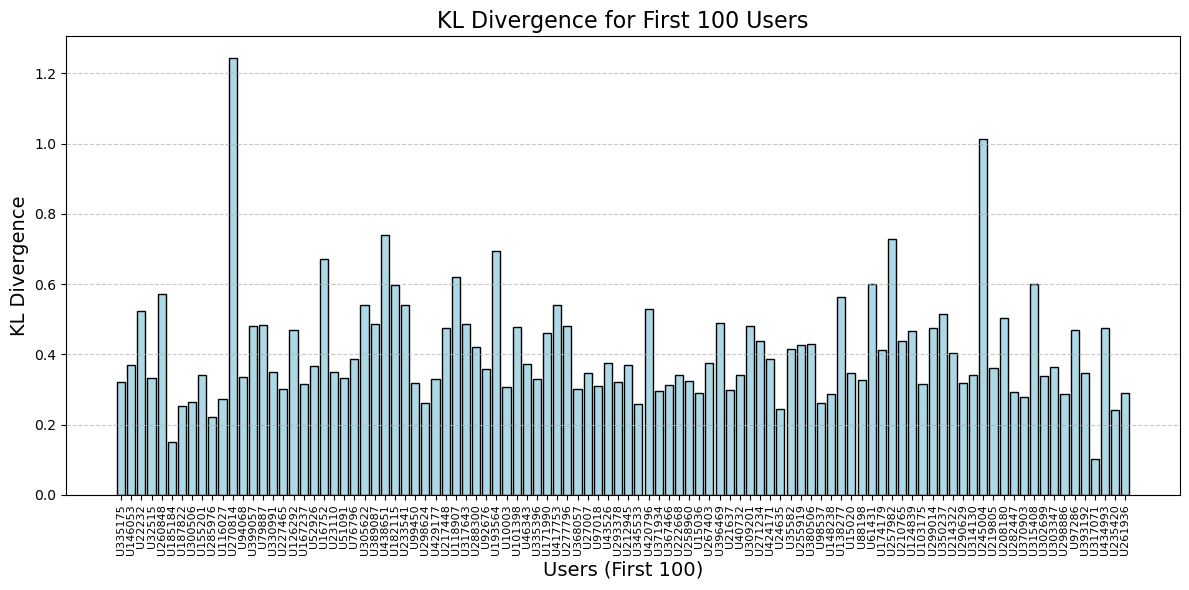

In [416]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the first 100 rows (assuming data is already ordered as required)
df_100 = processed_sample.head(100)

# Plotting KL divergence for the first 100 users
plt.figure(figsize=(12, 6))
plt.bar(df_100['UserID'], df_100['kl_divergence'], color='lightblue', edgecolor='black')
plt.title('KL Divergence for First 100 Users', fontsize=16)
plt.xlabel('Users (First 100)', fontsize=14)
plt.ylabel('KL Divergence', fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate User IDs for visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a file or display it
# Uncomment below to save the plot
# plt.savefig('kl_divergence_plot.png', dpi=300)
plt.show()

In [424]:
print(processed_sample['kl_divergence'])

0        0.321970
1        0.370737
2        0.522560
3        0.334029
4        0.572211
           ...   
40191    0.378392
40192    0.522449
40193    0.275157
40194    0.207763
40195    0.500785
Name: kl_divergence, Length: 40196, dtype: float64


In [434]:
processed_sample

,UserID,Docs,Action,Summaries,SummID,Mapped_Embeddings,Mapped_NewsIDs,Start_End_Pairs,upto_trajectory,upto_news_ids,...,reduced_embeddings_per_row,trajectory_weights,weighted_embeddings,aggregated_embeddings,final_probabilities,user_representation,user_normalized,user_shape,doc_shape,kl_divergence
0,U335175,"[N41340, N55476, N119282, N78688, N31171, N614...","[click, click, skip, click, click, skip, skip,...",2,"[S1, S2]","[[0.00465465104, 0.0199460033, 0.0619053431, 0...","[N24324, N93272]","[S1-N24324, S2-N93272]","[[click, click, skip, click, click, skip, skip...","[[N41340, N55476, N119282, N78688, N31171, N61...",...,"[[-0.10665816448598872, 0.02444701595885617, 0...","[0.4634146341463415, 0.5365853658536586]","[-0.0826323778675418, 0.08997368576423236, 0.0...","[-0.0826323778675418, 0.08997368576423236, 0.0...","[0.1088320544742915, 0.12933578060659012, 0.12...","[0.10450268817204302, 0.1420250896057348, 0.00...",True,"(8,)","(8,)",0.321970
1,U146053,"[N95202, N84319, N92854, N43563, N90061, N2942...","[click, click, skip, gen_summ, click, click, c...",5,"[S677002, S3, S4, S5, S6]","[[0.0831845105, -0.0176783428, 0.0223129559, 0...","[N104663, N43563, N97393, N104663, N98516]","[S677002-N104663, S3-N43563, S4-N97393, S5-N10...","[[click, click, skip], [click, click, skip, ge...","[[N95202, N84319, N92854], [N95202, N84319, N9...",...,"[[-0.2829911933836899, 0.4565061030150396, 0.1...","[0.09766454352441614, 0.010615711252653927, 0....","[-0.10546406947913237, 0.10197368158607495, 0....","[-0.10546406947913237, 0.10197368158607495, 0....","[0.11287799730400826, 0.13889875919487368, 0.1...","[0.16730436760234274, 0.0819130038711263, 0.00...",True,"(8,)","(8,)",0.370737
2,U22232,"[N25386, N90820, N35729, N32113, N83760, N1407...","[click, skip, click, click, skip, skip, skip, ...",1,[S7],"[[0.0679148138, 0.0567494705, 0.0224820692, -0...",[N122527],[S7-N122527],"[[click, skip, click, click, skip, skip, skip,...","[[N25386, N90820, N35729, N32113, N83760, N140...",...,"[[0.11960780944992469, -0.1593029661585924, 0....",[1.0],"[0.11960780944992469, -0.1593029661585924, 0.0...","[0.11960780944992469, -0.1593029661585924, 0.0...","[0.14074658015736918, 0.10648990520322578, 0.1...","[0.17117117117117117, 0.16216216216216217, 0.1...",True,"(8,)","(8,)",0.522560
3,U32515,"[N55509, N111634, N15992, N78883, N27093, N786...","[click, skip, click, click, click, click, skip...",3,"[S576795, S576796, S8]","[[-0.0376617014, 0.106951006, -0.0801659003, 0...","[N67596, N91754, N56068]","[S576795-N67596, S576796-N91754, S8-N56068]","[[click, skip, click, click, click, click, ski...","[[N55509, N111634, N15992, N78883, N27093, N78...",...,"[[-0.18634288495479043, -0.4395858041164469, -...","[0.2, 0.36666666666666664, 0.43333333333333335]","[0.19986517353632557, 0.0801501100603694, -0.1...","[0.19986517353632557, 0.0801501100603694, -0.1...","[0.14915487291984716, 0.13232620422604086, 0.1...","[0.03044871794871795, 0.19826007326007328, 0.0...",True,"(8,)","(8,)",0.334029
4,U260848,"[N113658, N58081, N99270, N20031, N30704, N656...","[skip, click, click, skip, skip, click, click,...",1,[S9],"[[-0.0272211544, -0.0756758451, 0.0490831845, ...",[N96591],[S9-N96591],"[[skip, click, click, skip, skip, click, click...","[[N113658, N58081, N99270, N20031, N30704, N65...",...,"[[0.2552124492116982, -0.014954144521818919, 0...",[1.0],"[0.2552124492116982, -0.014954144521818919, 0....","[0.2552124492116982, -0.014954144521818919, 0....","[0.15990205463356646, 0.12204561588109795, 0.1...","[0.07575757575757576, 0.25757575757575757, 0.1...",True,"(8,)","(8,)",0.572211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,U400050,"[N12686, N102284, N122550, N109222, N121699, N...","[click, click, click, click, click, click, cli...",3,"[S94262, S94263, S94264]","[[-0.0240074154, 0.0452588648, 0.0400203243, 0...","[N14904, N24324, N82646]","[S94262-N14904, S94263-N24324, S94264-N82646]","[[click, click, click, click, c

In [568]:
# Select the required columns
final_table = processed_sample[['UserID', 'kl_divergence', 'Interaction_Count', 'Click_Skip_Ratio']]
final_table.to_csv('kl_divergence.csv', index=False)

# Display the table
print(final_table.head())  # Display the first few rows

    UserID  kl_divergence  Interaction_Count  Click_Skip_Ratio
0  U335175       0.319773                121          0.815385
1  U146053       0.364372                323          2.974684
2   U22232       0.522469                100          0.650000
3   U32515       0.340677                 68          2.937500
4  U260848       0.571744                 97          1.133333
